<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Neural Networks with TensorFlow

_Authors: Justin Pounders (ATL) and Riley Dalles (ATX)_

---

<a id="learning-objectives"></a>
### Learning Objectives
- Describe the basic `tensorflow` workflow.
- Create computational graphs representing basic feed-forward neural networks.
- Train neural networks using `tensorflow`
- Create and train neural networks for both regression and classification

In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Computational Graphs

---

Tensorflow is fundamentally a library for creating **computational graphs**.

![](assets/comp_graph.png)

Let's define and evaluate this "computational graph."

**There are two phases to building a `tensorflow` model.**

1. Graph construction
2. Training/evaluation

In [2]:
# Build the graph
a=tf.Variable(3,name='a')
b=tf.Variable(4,name='b')
c=a+b
d=b+1
e=c*d


In [3]:
e

<tf.Tensor 'mul:0' shape=() dtype=int32>

In [4]:
# Evaluate the graph
init=tf.global_variables_initializer() # load the tensorflow 
# running tensorflow session as sess:
with tf.Session() as sess:
    init.run()
    
    result=sess.run(e)
    print(result)

35


## Building a Neural Network for Regression

---

Let's start by building a neural net for _regression_.  These are the steps we will follow:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

For regression, we will have one output unit (neuron) with _no_ activation function.  The value of this outpu unit will be prediction of the network given whatever input values went into the input layer.

### Steps 1-4

In [5]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
# data.data is the data matrix (input features)
# data.target is the label vector
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [6]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

### Step 5: Build the network/graph

In [7]:
X_test.shape #placeholder step:Our network will save a set of instructions for what types of computations to do
#For this to work, the computer needs to know what the data will look like
#i.e. will it be a 2D array, or 1D?, how many rows? etc.
#the placeholder layer provides this information for the network
#without actually passing in the data

(5160, 8)

In [8]:
X_train.shape

(15480, 8)

In [9]:
y_train.shape

(15480, 1)

In [10]:
# create a place holder , have to specify the type
tf.reset_default_graph() # reset the graph

X = tf.placeholder(dtype=tf.float32, 
                   shape=(None,X_train.shape[1]), # set the shape as shape 
                   name='X')
y = tf.placeholder(dtype=tf.float32,
                   shape=(None),
                   name='y')
#setting up the hidden 
h1=tf.layers.dense(X,8,activation=tf.nn.relu,name='hidden1') # lowercase #activation function
y_hat=tf.layers.dense(h1,1,activation=None,name='y_hat')

loss =tf.losses.mean_squared_error(y,y_hat)
optimizer=tf.train.AdamOptimizer(0.1)

training_run=optimizer.minimize(loss)


### Step 6: Train the network

In [11]:
init = tf.global_variables_initializer()

train_errs = []
test_errs = []
with tf.Session() as sess:
    init.run()
    
    for epoch in range(200):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        # Calculate train loss
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        train_errs.append(train_loss)
        
        # Calculate test loss
        test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
        test_errs.append(test_loss)
        
        # Print losses
        print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)
    pred = sess.run(y_hat, feed_dict={X: X_test})

epoch 0 train loss 2.1022387 test loss 2.0575085
epoch 1 train loss 1.1596892 test loss 1.1822075
epoch 2 train loss 1.2396127 test loss 1.2007258
epoch 3 train loss 1.3814819 test loss 1.2530305
epoch 4 train loss 1.1900164 test loss 1.0663164
epoch 5 train loss 0.93822044 test loss 0.87662685
epoch 6 train loss 0.7839898 test loss 0.7839278
epoch 7 train loss 0.7140315 test loss 0.7365127
epoch 8 train loss 0.6959278 test loss 0.7083939
epoch 9 train loss 0.7242731 test loss 0.7172313
epoch 10 train loss 0.76511896 test loss 0.73228383
epoch 11 train loss 0.7759912 test loss 0.72221434
epoch 12 train loss 0.74108326 test loss 0.68379647
epoch 13 train loss 0.6771135 test loss 0.6371141
epoch 14 train loss 0.6060588 test loss 0.5927881
epoch 15 train loss 0.55431163 test loss 0.5592253
epoch 16 train loss 0.53357774 test loss 0.5447464
epoch 17 train loss 0.53809035 test loss 0.5443949
epoch 18 train loss 0.55299366 test loss 0.5490985
epoch 19 train loss 0.5651873 test loss 0.5519407

epoch 161 train loss 0.36297232 test loss 0.37403262
epoch 162 train loss 0.3625738 test loss 0.37374952
epoch 163 train loss 0.36218122 test loss 0.3732648
epoch 164 train loss 0.361812 test loss 0.37268072
epoch 165 train loss 0.36145675 test loss 0.3720692
epoch 166 train loss 0.36111578 test loss 0.37176725
epoch 167 train loss 0.36077762 test loss 0.37156177
epoch 168 train loss 0.36044317 test loss 0.37117592
epoch 169 train loss 0.36011234 test loss 0.37076408
epoch 170 train loss 0.35978067 test loss 0.3705982
epoch 171 train loss 0.3594462 test loss 0.37038985
epoch 172 train loss 0.3591257 test loss 0.37025398
epoch 173 train loss 0.35880697 test loss 0.37029412
epoch 174 train loss 0.35849926 test loss 0.36979452
epoch 175 train loss 0.3581929 test loss 0.36926278
epoch 176 train loss 0.357893 test loss 0.3689547
epoch 177 train loss 0.3575992 test loss 0.36848164
epoch 178 train loss 0.35730484 test loss 0.36791912
epoch 179 train loss 0.3570103 test loss 0.36764303
epoch 1

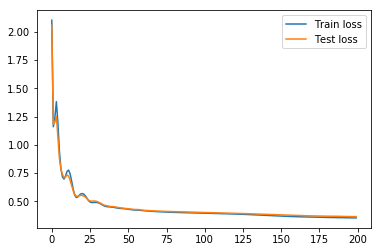

In [12]:
# Plot the learning curves
plt.plot(train_errs, label='Train loss')
plt.plot(test_errs, label='Test loss')
plt.legend();

In [13]:
# Evaluate r^2
metrics.r2_score(y_test, pred)


0.7365309223358643

In [14]:
# Plot the learning curves


## Building a Neural Network for Binary Classification

---

Now we'll build a neural net for _classification_.  We will follow the same steps as for regression:

1. Load the data.
2. Data cleaning/munging, feature engineering (will not do today)
3. Make test/train splits. (Should we use cross validation?)
4. Standardize the data.
5. Build the computational graph for the neural network.
6. Train the network using gradient descent a.k.a. back propogation.
7. Evaluate performance and iterate.

For _binary classification_ we will have one output unit that will represent the **probability** of "class 1."  Because we want a probability as output, we need to select an activation function that yields values between 0 and 1, i.e., sigmoid function or similar.

In [21]:
from sklearn.datasets import make_classification

data = make_classification(n_samples=10000, n_features=20, random_state=42)
# in data.target...
#  1 = benign
#  0 = malignant
features, labels = make_classification(n_samples=10000, n_features=20, random_state=42)
# in data.target...
#  1 = benign
#  0 = malignant
X_train, X_test, y_train, y_test = train_test_split(features, labels)
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [30]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [31]:
tf.reset_default_graph()

X = tf.placeholder(dtype=tf.float32, shape=(None, X_train.shape[1]), name='X')
y = tf.placeholder(dtype=tf.float32, shape=(None, 1), name='y')

h1 = tf.layers.dense(X, 20, activation=tf.nn.relu, name='hidden1')
# adding another layer
h2 = tf.layers.dense(h1, 10, activation=tf.nn.relu, name='hidden2')
y_hat = tf.layers.dense(h2, 1, activation=tf.nn.sigmoid, name='y_hat')

loss = tf.losses.log_loss(y, y_hat)
optimizer = tf.train.AdamOptimizer(.01)
training_run = optimizer.minimize(loss)

In [32]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        
        if epoch % 10 == 0:
            train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
            test_loss = sess.run(loss, feed_dict={X: X_test, y: y_test})
            print('epoch', epoch, 'train loss', train_loss, 'test loss', test_loss)

epoch 0 train loss 0.73798627 test loss 0.740544
epoch 10 train loss 0.44768167 test loss 0.4714464
epoch 20 train loss 0.3041889 test loss 0.3337019
epoch 30 train loss 0.28197545 test loss 0.30885085
epoch 40 train loss 0.25892663 test loss 0.28745264


Before moving on, let's go back and add a new hidden layer to our network...

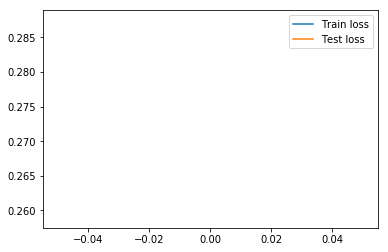

In [35]:
# Plot the learning curves
plt.plot(train_loss, label='Train loss')
plt.plot(test_loss, label='Test loss')
plt.legend();

### Batching the input

What if we can't store all of the training data in memory?

We can split the data up into "batches" and feed them to the network one at a time.  This just means that we splitting up the data and feeding it to the network one piece at a time.

You could write your own function to dole out subsets of the data one at a time, or you could use this creative hack to get `sklearn` to do it for you.  (Thanks, Riley, for showing me this!)

In [36]:
from sklearn.model_selection import train_test_split, KFold


In [38]:
batch_size = 100
batches = round(X_train.shape[0] / batch_size)
batches

kf = KFold(n_splits=batches, shuffle=True)

batch_list = []
for train, test in kf.split(X_train, y_train):
    batch_list.append(test_fold)
    
# batch_list = [y for _, y in kf.split(X_train, y_train)]

In [45]:
Saver=tf.train.Saver()

In [41]:
len(batch_list)

75

In [46]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    
    for epoch in range(50):
        for batch in batch_list:
            X_batch = X_train[batch]
            y_batch = y_train[batch]
            sess.run(training_run, feed_dict={X: X_batch, y: y_batch})
        train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
        print('epoch', epoch, 'train', train_loss)
    Saver.save(sess,'./classification.ckpt')

epoch 0 train 0.25990275
epoch 1 train 0.22426528
epoch 2 train 0.21548931
epoch 3 train 0.21087152
epoch 4 train 0.20720808
epoch 5 train 0.20385271
epoch 6 train 0.20112607
epoch 7 train 0.19824308
epoch 8 train 0.19493145
epoch 9 train 0.19278729
epoch 10 train 0.18985556
epoch 11 train 0.1865451
epoch 12 train 0.1841415
epoch 13 train 0.18207574
epoch 14 train 0.17858686
epoch 15 train 0.17523755
epoch 16 train 0.1728377
epoch 17 train 0.17040236
epoch 18 train 0.1690107
epoch 19 train 0.16739334
epoch 20 train 0.16547397
epoch 21 train 0.16367903
epoch 22 train 0.16092895
epoch 23 train 0.15953508
epoch 24 train 0.15715726
epoch 25 train 0.157494
epoch 26 train 0.15654033
epoch 27 train 0.15489145
epoch 28 train 0.15465556
epoch 29 train 0.15367319
epoch 30 train 0.15200156
epoch 31 train 0.15233368
epoch 32 train 0.15054938
epoch 33 train 0.15079094
epoch 34 train 0.14976798
epoch 35 train 0.15015757
epoch 36 train 0.14941536
epoch 37 train 0.14829178
epoch 38 train 0.14747877
ep

In [49]:
with tf.Session() as sess:
    Saver.restore(sess,'./classification.ckpt')
    pred=sess.run(y_hat,feed_dict={X:X_test})

INFO:tensorflow:Restoring parameters from ./classification.ckpt


In [50]:
# What are youre actual predicted classes?
classes=(pred>0.5).astype(int)

In [51]:
# What is your accuracy score?
metrics.accuracy_score(y_test,classes)

0.9196

In [52]:
# What about your confusion matrix?
metrics.confusion_matrix(y_test,classes)

array([[1181,   98],
       [ 103, 1118]])

## Building a Neural Network for Multi-Class Classification

---

In _multi-class_ classification (i.e., more than 2 classes), we typically setup on output unit **per class** and use a "softmax" activation function to normalize all values between 0 and 1 so that they look like probabilities.  The output unit with the largest value corresponds to the class prediction.  (I.e., unit 3 had the highest value, so I will predict class 3.)

In [20]:
from sklearn.datasets import load_iris
import pandas as pd

In [55]:
data = load_iris()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target)

ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [56]:
from keras.utils import to_categorical

In [57]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [59]:
y_train[:5]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [61]:
tf.reset_default_graph()
X=tf.placeholder(dtype=tf.float32,shape=(None,4),name='X')
y=tf.placeholder(dtype=tf.float32,shape=(None,3),name='X')

h1=tf.layers.dense(X,4,activation=tf.nn.relu, name='h1')
y_hat=tf.layers.dense(h1,3,activation=None, name='y_hat') # soft_max is auto

loss =tf.losses.softmax_cross_entropy(y,y_hat)
optimizer=tf.train.AdamOptimizer(0.01)
training_run=optimizer.minimize(loss)

In [63]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    for epoch in range(50):
        sess.run(training_run, feed_dict={X: X_train, y: y_train})
        if epoch % 10 == 0:
            train_loss = sess.run(loss, feed_dict={X: X_train, y: y_train})
            print('epoch', epoch, 'train', train_loss)
    pred = sess.run(y_hat, feed_dict={X: X_test})

epoch 0 train 1.0417844
epoch 10 train 0.8250141
epoch 20 train 0.6223268
epoch 30 train 0.49209303
epoch 40 train 0.42149705


In [64]:
# which class has the largest number
pred.argmax(axis=1)

array([1, 2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2])

In [65]:
#for each input this is the classification output per row


## Saving Your Model

---

## Practical Suggestions

---

- In binary classification, start with a single output node with a sigmoid activation function.
- For multi-class classification, have one output node for each class and use the softmax activation function.
- For hidden layers, the ReLU and hyperbolic tangent (tanh) activation functions often work well.  Start with the ReLU as your first trial.
- Start with one hidden layer, then trying adding another if performance is not good.
- For simplicity, start with the same number of units in each hidden layer, then increase this number for all hidden layers simultaneously if the performance is not good.
- Alternatively, you can use the "stretchy pants" approach and through a lot of hidden nodes into your network, but then stop training as soon as you detect the onset of overfitting.

> These suggestions are largely adapted from the book _Hands-on Machine Learning with Scikit-Learn & Tensorflow_ by Aurelien Geron, a book I highly recommend!